In [1]:
import numpy as np
np.set_printoptions(threshold=np.nan)
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

# Numpy

In [2]:
a = np.array([0,1,2,3,4,5])
print a.shape, a.ndim
a

(6,) 1


array([0, 1, 2, 3, 4, 5])

In [3]:
b = a.reshape((3,2)) # will create link, so changes in b produce changes to a
print b.shape, b.ndim
b

(3, 2) 2


array([[0, 1],
       [2, 3],
       [4, 5]])

In [4]:
b[1][0] = 77
a

array([ 0,  1, 77,  3,  4,  5])

In [5]:
c = a.reshape((3,2)).copy() # explicitly create object copy
c[1][0] = 101
print c, a

[[  0   1]
 [101   3]
 [  4   5]] [ 0  1 77  3  4  5]


In [6]:
c ** 2

array([[    0,     1],
       [10201,     9],
       [   16,    25]])

In [7]:
print a > 4, ' & ', a[a > 4]

[False False  True False False  True]  &  [77  5]


In [8]:
a.clip(0, 4) # from min to max if value > max value will be replaced with max value

array([0, 1, 4, 3, 4, 4])

Compare numpy with usual python stuff

In [9]:
import timeit
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))', number=10000)
naive_np_sec = timeit.timeit('sum(na*na)', setup="import numpy as np; na=np.arange(1000)", number=10000)
good_np_sec = timeit.timeit('na.dot(na)', setup="import numpy as np; na=np.arange(1000)", number=10000)

print "Normal Python: %f sec" % normal_py_sec
print "Naive NumPy: %f sec" % naive_np_sec
print "Good NumPy: %f sec" % good_np_sec

Normal Python: 0.884349 sec
Naive NumPy: 1.264756 sec
Good NumPy: 0.018122 sec


# SciPy

In [10]:
sp.dot is np.dot # all numpy stuff available from scipy namespace

True

In [11]:
data = sp.genfromtxt("BuildingMachineLearningSystemsWithPython/ch01/data/web_traffic.tsv", delimiter="\t")
print "Shape is:", data.shape
print data[:3]

Shape is: (743, 2)
[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]]


In [12]:
x = data[:,0]
y = data[:,1]

In [13]:
sp.sum(sp.isnan(y))

8

In [14]:
# remove lines with y == NaN
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

# Practice

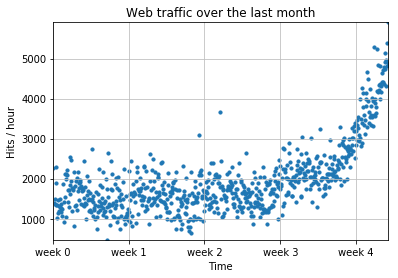

In [15]:
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits / hour")
plt.xticks([w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
plt.show()

In [16]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True) # находим прямую с минимальной погрешностью апроксимации

In [17]:
print "Параметры модели: %s" % fp1
print residuals

# это означает, что наилучшую линейную апроксимацию дает следующая функция
# f(x) = 2.59619213 * x + 989.02487106

Параметры модели: [   2.59619213  989.02487106]
[  3.17389767e+08]


In [18]:
# ф-я погрешности (квадрат расстояния между реальными и предсказанными данными)
def error(f, x, y):
    return sp.sum((f(x) - y) ** 2)

f1 = sp.poly1d(fp1)
print error(f1, x, y)

317389767.34


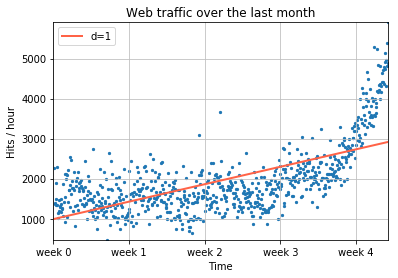

In [19]:
plt.scatter(x, y, s=5)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits / hour")
plt.xticks([w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')

fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=2, color="tomato")
plt.legend(["d=%i" % f1.order], loc="upper left")
plt.show()

In [32]:
f2p = sp.polyfit(x, y, 2)
print f2p
f2 = sp.poly1d(f2p)
print error(f2, x, y)

# это означает, что наилучшую линейную апроксимацию дает следующая функция
# f(x) = 0.0105322215 * x ** 2 - 5.26545650 + 1974.76082

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
179983507.878


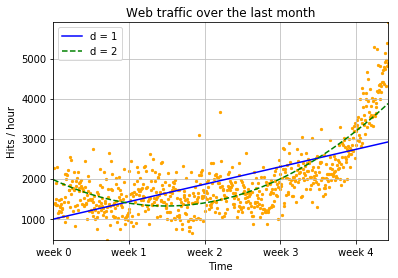

In [33]:
plt.scatter(x, y, s=5, color='orange')
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits / hour")
plt.xticks([w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')

fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=1.5, color="blue")

plt.plot(fx, f2(fx), linewidth=1.5, color="green", ls='--')
plt.legend(["d = %i" % f1.order, "d = %i" % f2.order], loc="upper left")
plt.show()

In [44]:
f3p = sp.polyfit(x, y, 3)
f3 = sp.poly1d(f3p)

f10p = sp.polyfit(x, y, 10)
f10 = sp.poly1d(f10p)

print "Error d=1", error(f1, x, y)
print "Error d=2", error(f2, x, y)
print "Error d=3", error(f3, x, y)
print "Error d=10", error(f10, x, y)

Error d=1 317389767.34
Error d=2 179983507.878
Error d=3 139350144.032
Error d=10 121942326.364


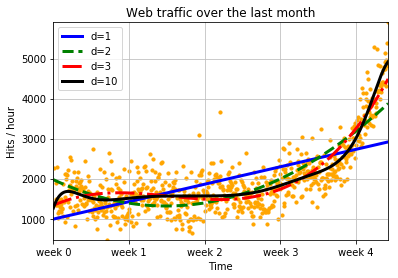

In [58]:
plt.scatter(x, y, s=10, color='orange')
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits / hour")
plt.xticks([w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')

fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=3, color="blue")
plt.plot(fx, f2(fx), linewidth=3, color="green", ls='--')
plt.plot(fx, f3(fx), linewidth=3, color="red", ls='-.')
plt.plot(fx, f10(fx), linewidth=3, color="black", ls='-')

plt.legend(["d=%i" % f1.order, "d=%i" % f2.order, "d=%i" % f3.order, "d=%i" % f10.order], loc="upper left")
plt.show()

In [61]:
# выбранная точка раздела - неделя 3.5
inflection = int(3.5 * 7 * 24) # положение точки изгиба в часах
xa = x[:inflection] # данные до точки изгиба
ya = y[:inflection]
xb = x[inflection:] # данные после точки изгиба
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)

print "Error inflection = %f" % (fa_error + fb_error)

Error inflection = 132950348.197616


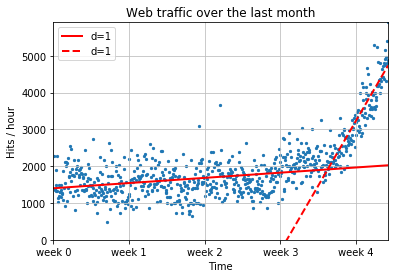

In [80]:
plt.scatter(x, y, s=5)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits / hour")
plt.xticks([w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')

fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, fa(fx), linewidth=2, color="red")
plt.plot(fx, fb(fx), linewidth=2, color="red", ls='--')
plt.ylim(0) # pretty plot, or do not show fb for y < 0

plt.legend(["d=%i" % fa.order, "d=%i" % fb.order], loc="upper left")
plt.show()

In [85]:
fbt2 = sp.poly1d(sp.polyfit(xb, yb, 2))

In [90]:
from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000, x0=800) / (7*24)
print reached_max[0] # если поведение сохранится, то максимум пропускной способности будет достигнут на этой неделе

9.83796443479
